In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(); 
from scipy.stats import probplot, ttest_ind, chi2_contingency

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
data=pd.concat([test,train]) 
# combine both sets vertically because we dont need a test set for hp testing
data.describe()

/home/quentin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


## Hypothesis testing 1 : children vs others and probability of surviving

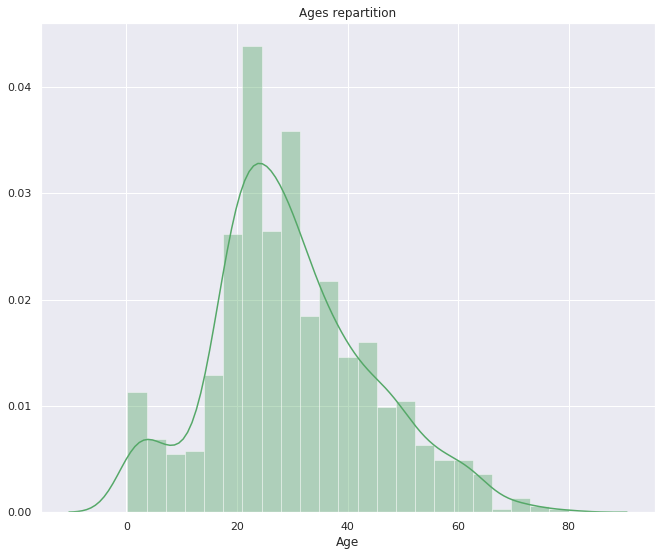

In [3]:
f, ax = plt.subplots(figsize=(11, 9))

no_nans=data.loc[data['Age'].notnull(),'Age']
sns.distplot(no_nans,ax=ax, color="g")
ax.set_title("Ages repartition")

data.dropna(inplace=True)

In [4]:
data['binarize_age'] = pd.cut(data['Age'], bins=[0,18,100])

CategoricalDtype(categories=[(0, 18], (18, 100]],
              ordered=True)

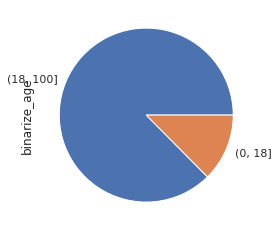

In [5]:
data['binarize_age'].value_counts().plot(kind='pie')
data['binarize_age'].dtypes

In [6]:
age = data['binarize_age'].cat.codes
sex = data['Sex'].astype('category').cat.codes

In [7]:
ttest_ind(age,data.Survived)

Ttest_indResult(statistic=4.746351030135237, pvalue=2.98159729203779e-06)

In [8]:
ttest_ind(sex, data.Survived)

Ttest_indResult(statistic=-3.0108655414626977, pvalue=0.0027868731798734417)

In [9]:
data['Fare']

1      71.2833
3      53.1000
6      51.8625
10     16.7000
11     26.5500
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 183, dtype: float64

In [10]:
data['binarize_fare'] = pd.cut(data['Fare'], bins=[0,60,515])
bin_fare = data['binarize_fare'].cat.codes 
bin_fare

1      1
3      0
6      0
10     0
11     0
      ..
871    0
872    0
879    1
887    0
889    0
Length: 183, dtype: int8

In [15]:
cross = pd.crosstab(index=bin_fare,
            columns=data['Survived'])
cross

Survived,0.0,1.0
row_0,,
-1,2,0
0,35,58
1,23,65


In [16]:
g, p, dof, expctd = chi2_contingency(cross)
g, p

(6.8578733340485885, 0.03242139719108936)